In [4]:
include("ActFunctions.jl")
include("Brain.jl")

using CSV
using LaTeXStrings
using Plots
using Random
using StatsBase

# Fixed seed for testing
Random.seed!(1234);

# Plot rendering
default(show = true)


# Data Pre Processing


In [5]:
data_csv = CSV.File("datosIA.csv")
data = zeros(length(data_csv), 3)
i = 1
for row in data_csv
    data[i, 1] = row.X
    data[i, 2] = row.OD
    data[i, 3] = row.S
    i += 1
end

# Normalize data
data = data ./ maximum(abs.(data), dims = 1);


## Training Data
The training data is selected as the 60% of the original data. Furthermore, a
uniform sampling is used.


In [6]:
indexes = collect(1:size(data)[1])

# Samples percentage
n_training = trunc(Int, 0.6 * size(data)[1])
n_testing = trunc(Int, 0.2 * size(data)[1])

# Sampling training
indexes_tr = sort(sample(collect(indexes), n_training, replace = false))
data_training = data[indexes_tr, :]

# Sampling testing
indexes_avail = []
for i in indexes
    if i ∉ indexes_tr
        push!(indexes_avail, i)
    end
end
indexes_te = sort(sample(indexes_avail, n_testing, replace = false))
data_testing = data[indexes_te, :]

# Sampling validation
indexes_val = []
for i in indexes
    if i ∉ indexes_tr && i ∉ indexes_te
        push!(indexes_val, i)
    end
end
indexes_val = sort(indexes_val)
data_val = data[indexes_val, :];


# Input and Output Definition


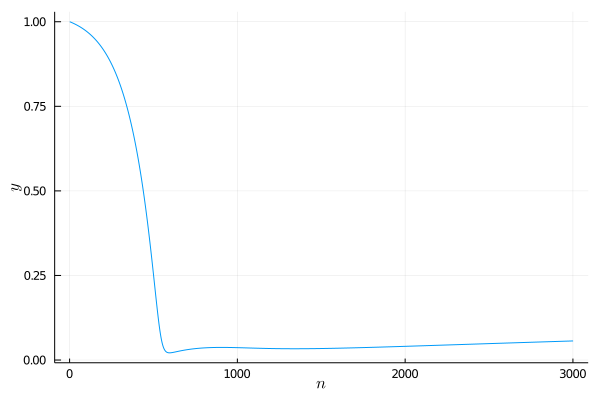

In [7]:
input = [1, 2]
output = [3]

# Plotting outout
y = data[:, output]
plot(y,
     legend = false,
     xlabel = L"$n$",
     ylabel = L"$y$")


# Learning Data


In [8]:
# Activation Functions
sig = Sigmoid()

# Brain with learning rate of 0.2
brain = Brain(2, 1, [5, 5], [sig, sig, sig])
grads, inst_err, avg_err = brain.learn_data(data_training[:, input], data_training[:, output], η=0.2,
                                            α=0, epocs=50)

# Brain with learning rate of 0.9
brain2 = Brain(2, 1, [5, 5], [sig, sig, sig])
grads2, inst_err2, avg_err2 = brain2.learn_data(data_training[:, input], data_training[:, output], η=0.9,
                                                α=0, epocs=50);


## With Learning Rate of 0.2
Here the variable $n$ is the number of epocs.


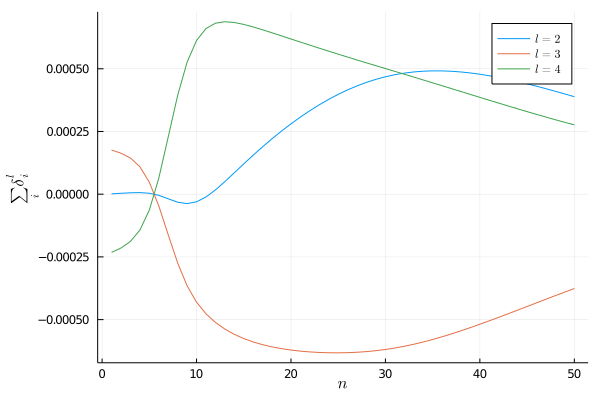

In [9]:
plot(grads,
     label = [L"$l = 2$" L"$l = 3$" L"$l = 4$"],
     xlabel = L"$n$",
     ylabel = L"$\sum_i \delta^l_i$")


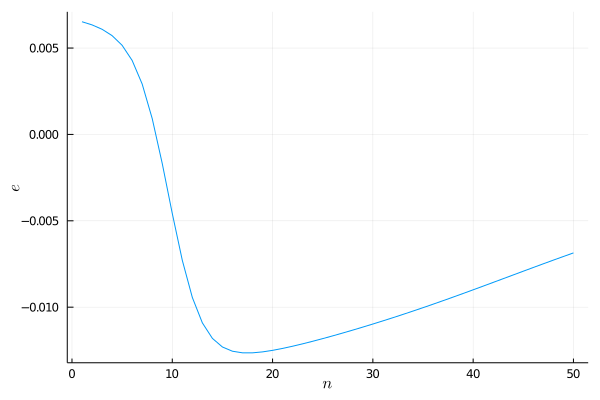

In [87]:
plot(inst_err,
     legend = false,
     xlabel = L"$n$",
     ylabel = L"$e$")


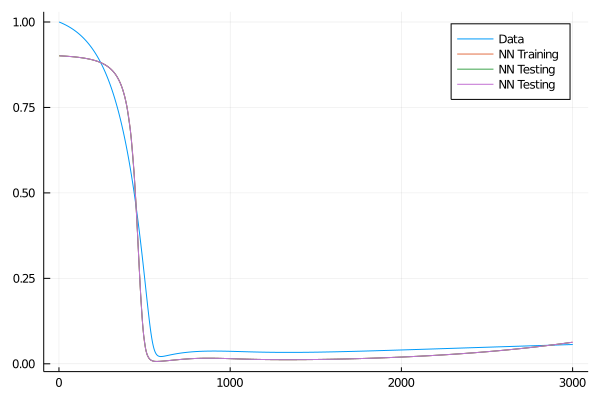

In [91]:
# Output of nn
y_nn_training = zeros(n_training, 1)
y_nn_testing = zeros(n_testing, 1)
y_nn_val = zeros(size(data_val, 1), 1)

# Creating outputs
j = 1
for i in indexes_tr
    y_nn_training[j] = brain.propagate(data[i, input])[1]
    j += 1
end

j = 1
for i in indexes_te
    y_nn_testing[j] = brain.propagate(data[i, input])[1]
    j += 1
end

j = 1
for i in indexes_val
    y_nn_val[j] = brain.propagate(data[i, input])[1]
    j += 1
end

# Plotting
plot(data[:, output],
     label = "Data")
plot!(indexes_tr, y_nn_training,
      label = "NN Training")
plot!(indexes_te, y_nn_testing,
      label = "NN Testing")
plot!(indexes_val, y_nn_val,
      label = "NN Testing")


## With Learning Rate of 0.9


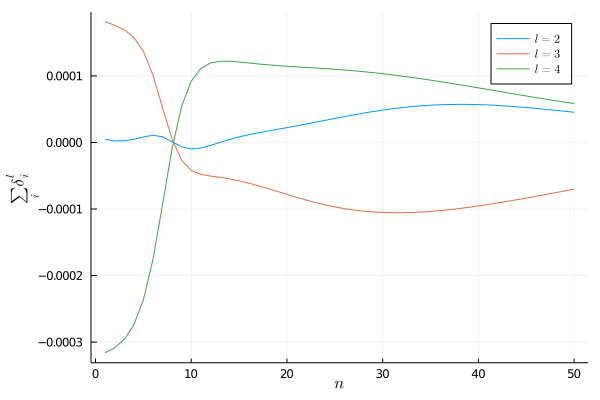

In [10]:
plot(grads2,
     label = [L"$l = 2$" L"$l = 3$" L"$l = 4$"],
     xlabel = L"$n$",
     ylabel = L"$\sum_i \delta^l_i$")


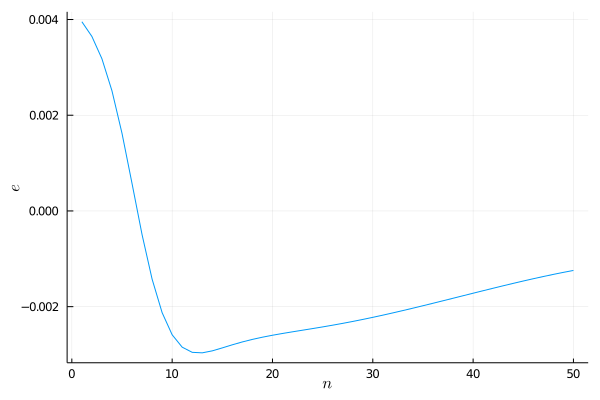

In [94]:
plot(inst_err2,
     legend = false,
     xlabel = L"$n$",
     ylabel = L"$e$")


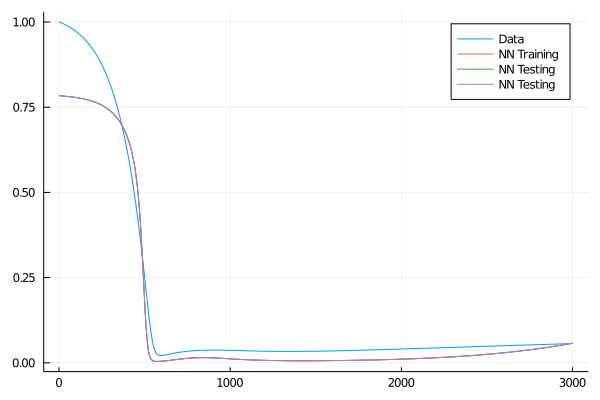

In [95]:
# Output of nn
y_nn_training = zeros(n_training, 1)
y_nn_testing = zeros(n_testing, 1)
y_nn_val = zeros(size(data_val, 1), 1)

# Creating outputs
j = 1
for i in indexes_tr
    y_nn_training[j] = brain2.propagate(data[i, input])[1]
    j += 1
end

j = 1
for i in indexes_te
    y_nn_testing[j] = brain2.propagate(data[i, input])[1]
    j += 1
end

j = 1
for i in indexes_val
    y_nn_val[j] = brain2.propagate(data[i, input])[1]
    j += 1
end

# Plotting
plot(data[:, output],
     label = "Data")
plot!(indexes_tr, y_nn_training,
      label = "NN Training")
plot!(indexes_te, y_nn_testing,
      label = "NN Testing")
plot!(indexes_val, y_nn_val,
      label = "NN Testing")


# Which is the dynamic easier to learn?
The last part where the data stabilizes at a certain point was the one each of
the neural networks easily learned. On the other hand, the initial part where
there is a big slope of decreasing values the NN is not able to learn it
properly.
